In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Asteroid_Normalized.csv')
data

,a,e,i,om,w,q,ad,per_y,H,pha,diameter,albedo,rot_per,GM,BV,UB,moid,n,per,ma
0,0.354908,0.213852,0.083238,0.393319,0.996385,0.379566,0.229142,0.259400,0.091219,0.0,0.533248,0.270352,0.010200,NaN,0.494970,0.543925,0.256055,0.136087,0.259400,0.784363
1,0.324537,0.227253,0.229741,0.385161,0.666141,0.350354,0.211422,0.232195,0.013615,0.0,0.926577,0.264221,0.004392,NaN,0.486922,0.521495,0.227563,0.154294,0.232195,0.239430
2,0.316424,0.258977,0.085688,0.721104,0.403507,0.331006,0.213728,0.225067,0.000000,0.0,1.000000,0.272965,0.004309,NaN,0.553320,0.680374,0.197683,0.159643,0.225067,0.390052
3,0.279029,0.174932,0.091367,0.308065,0.792483,0.335571,0.167190,0.192983,0.066712,0.0,0.737689,0.222111,0.007799,NaN,0.613682,0.689720,0.204244,0.187472,0.192983,0.541344
4,0.316486,0.137375,0.086519,0.191436,0.017794,0.381443,0.183041,0.225121,0.052417,0.0,0.950734,0.113568,0.003054,NaN,0.559356,0.702804,0.258631,0.159601,0.225121,0.769072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,0.308267,0.116138,0.063671,0.716155,0.952911,0.383182,0.172365,0.217959,0.693669,0.0,0.008184,0.355779,NaN,NaN,NaN,NaN,0.254284,0.165251,0.217959,0.477225
24364,0.313748,0.167089,0.065494,0.034126,0.549054,0.366897,0.188709,0.222728,0.714091,0.0,0.006280,0.418090,NaN,NaN,NaN,NaN,0.236695,0.161456,0.222728,0.370383
24365,0.376055,0.259840,0.161207,0.826406,0.196702,0.374582,0.256923,0.278815,0.618788,0.0,0.037268,0.038191,NaN,NaN,NaN,NaN,0.252686,0.124890,0.278815,0.165555
24366,0.364056,0.313769,0.090133,0.169786,0.754505,0.341206,0.263239,0.267752,0.625596,0.0,0.014599,0.267337,NaN,NaN,NaN,NaN,0.206996,0.131107,0.267752,0.399286


In [3]:
sel_data1 = data[['q', 'moid', 'H', 'diameter']]
sel_data1 = sel_data1.dropna()

sel_data1

,q,moid,H,diameter
0,0.379566,0.256055,0.091219,0.533248
1,0.350354,0.227563,0.013615,0.926577
2,0.331006,0.197683,0.000000,1.000000
3,0.335571,0.204244,0.066712,0.737689
4,0.381443,0.258631,0.052417,0.950734
...,...,...,...,...
24363,0.383182,0.254284,0.693669,0.008184
24364,0.366897,0.236695,0.714091,0.006280
24365,0.374582,0.252686,0.618788,0.037268
24366,0.341206,0.206996,0.625596,0.014599


In [4]:
from keras.models import Sequential
from keras.layers import Dense

2024-07-22 16:36:49.476729: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sel_data1, test_size=0.2, random_state=42)

X_train = train_df[['moid', 'H']]
y_train = train_df['diameter']

X_test = test_df[['moid', 'H']]
y_test = test_df['diameter']


In [10]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 2))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'relu'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = classifier.fit(train_df.astype(float).drop(columns = ['diameter', 'q']), train_df.astype(float)['diameter'], batch_size = 32, epochs = 20)

Epoch 1/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - loss: 7.8952e-04
Epoch 2/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 8.1506e-04
Epoch 3/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 7.6488e-04
Epoch 4/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.7735e-04
Epoch 5/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.1194e-04
Epoch 6/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3100e-04
Epoch 7/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6631e-04
Epoch 8/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - loss: 7.9036e-04
Epoch 9/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8611e-04
Epoch 10/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3245e-04   
Epoch 11/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 8.0485e-04
Epoch 12/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 7.7473e-04
Epoch 13/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 8.0371e-04
Epoch 14/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step -

In [22]:
yhat_test = classifier.predict(test_df.drop(columns = ['diameter', 'q']))
yhat_test

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


array([[0.04889091],
       [0.05136948],
       [0.04122645],
       ...,
       [0.021375  ],
       [0.04441347],
       [0.02383946]], dtype=float32)

In [23]:
y_test = test_df['diameter'].astype(float)
y_test

8648     0.031905
21091    0.042926
5953     0.088167
17805    0.012179
3503     0.047271
           ...   
8195     0.020358
7107     0.017120
9129     0.015907
13829    0.027199
18391    0.015326
Name: diameter, Length: 4874, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, yhat_test)
print("Neural-MSE",mse)

Neural-MSE 0.0007568662286308027


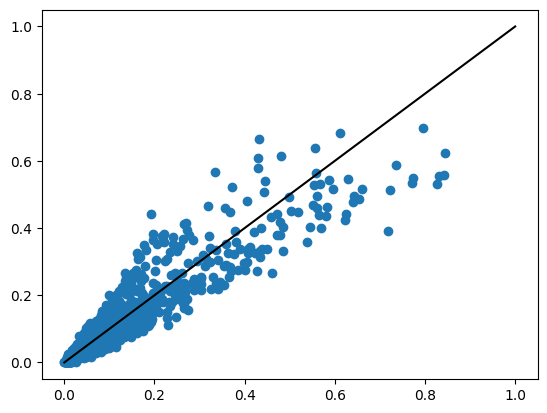

In [20]:
#Graph for y_test and yhat_test with labels
plt.scatter(y_test, yhat_test)
#draw a line at 45 deg angle
plt.plot([0, 1], [0, 1], color = 'black')

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
import keras_tuner as kt
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from keras.optimizers import Adam

In [83]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(2,)))
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=10, max_value=30, step=10),
                        activation=hp.Choice("activation", ["relu"]),))

    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [84]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    overwrite=True,
    project_name='asteroid'
)

In [85]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 30, 'step': 10, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [86]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.1, batch_size=32)

Trial 10 Complete [00h 01m 13s]
val_mean_squared_error: 0.0008274952997453511

Best val_mean_squared_error So Far: 0.0008040877291932702
Total elapsed time: 00h 11m 02s
